In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
import scipy.constants as con
import scipy

In [48]:
con.hbar

1.0545718001391127e-34

In [49]:
B_0 = (10**9)/con.hbar
w = 18*(10**9)
T = ((2*np.pi)/w)
w1 = 10**9

In [50]:
a = np.zeros((8,8))

In [51]:
# deffining O
a[0][0] = 21
a[1][1] = 3
a[2][2] = -9
a[3][3] = -15
a[4][4] = -15
a[5][5] = -9
a[6][6] = 3
a[7][7] = 21

In [52]:
H_0 = B_0*a*(con.hbar)**2

In [53]:
b = np.zeros((8,8))

b[0][1] = np.sqrt(7)
b[1][2] = 2*np.sqrt(3)
b[2][3] = np.sqrt(15)
b[3][4] = 4
b[4][5] = np.sqrt(15)
b[5][6] = 2*np.sqrt(3)
b[6][7] = np.sqrt(7) 

b=b*con.hbar

c = np.transpose(b)
#b is J+ and c is J-


In [54]:
im = 1j

In [55]:
im = 1j
I = np.zeros((8,8))
for i in range(len(I)):
    for j in range(len(I)):
        if(i==j):
            I[i][j] = 1

In [56]:
#going to T in N steps using U=1-i/hbar(H)dt
result = []
time = []
state = np.zeros(8)
state[0] = 1
N=1000
dt = T/N

for count in range(N):
    t = T*(count/N)
    H_1 = w1*np.e**(-1*im*dt*w)*b + w1*np.e**(im*dt*w)*c
    H=H_0+H_1
    u = I - ((im)/con.hbar)*(H)*(dt)
    time.append(t/(10**9))
    result.append(state)
    temp = np.matmul(u,state)
    norm=(np.linalg.norm(temp))
    temp = temp/norm
    state = temp
    
y = []
for i in range(len(result)):
    y.append(np.linalg.norm(result[i][1]))

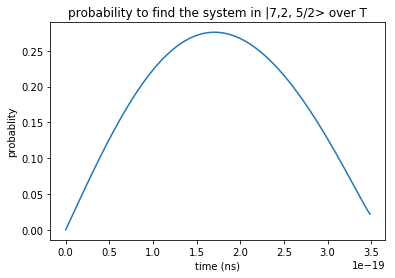

In [57]:
plt.title("probability to find the system in |7,2, 5/2> over T")
plt.xlabel("time (ns)")
plt.ylabel("probablity")
plt.plot(time,y)
plt.show()

In [58]:
#going to multiple periods in N steps using U=1-i/hbar(H)dt
T=4*T
result = []
time = []
state = np.zeros(8)
state[0] = 1
N=1000
dt = T/N

for count in range(N):
    t = T*(count/N)
    H_1 = w1*np.e**(-1*im*dt*w)*b + w1*np.e**(im*dt*w)*c
    H=H_0+H_1
    u = I - ((im)/con.hbar)*(H)*(dt)
    time.append(t/(10**9))
    result.append(state)
    temp = np.matmul(u,state)
    norm=(np.linalg.norm(temp))
    temp = temp/norm
    state = temp
    
y = []
for i in range(len(result)):
    y.append(np.linalg.norm(result[i][1]))

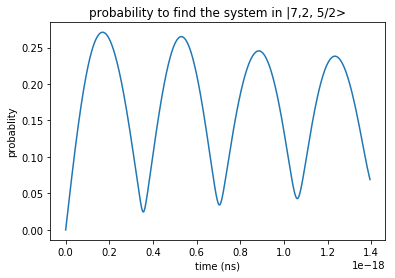

In [59]:
plt.title("probability to find the system in |7,2, 5/2>")
plt.xlabel("time (ns)")
plt.ylabel("probablity")
plt.plot(time,y)
plt.show()

In [60]:
T

1.3962634015954636e-09

In [61]:
a = state/np.linalg.norm(state)

Question 7

In [62]:
# deffining J_z
J = np.zeros((8,8))
J[0][0] = 7/2
J[1][1] = 5/2
J[2][2] = 3/2
J[3][3] = 1/2
J[4][4] = -1/2
J[5][5] = -3/2
J[6][6] = -5/2
J[7][7] = -7/2
J=con.hbar*J

In [63]:
Heff=H_0+w1*(b+c)-w*(J)
print(Heff)

[[-4.42920156e-24  2.79013472e-25  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.79013472e-25 -4.42920156e-24  3.65314388e-25  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.65314388e-25 -3.79645848e-24  4.08433902e-25
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.08433902e-25 -2.53097232e-24
   4.21828720e-25  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.21828720e-25
  -6.32743080e-25  4.08433902e-25  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   4.08433902e-25  1.89822924e-24  3.65314388e-25  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.65314388e-25  5.06194464e-24  2.79013472e-25]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

In [64]:
E=np.linalg.eig(Heff)
print(np.linalg.eig(Heff))

(array([-4.27508468e-24, -4.79017196e-24, -3.72085884e-24, -2.49329194e-24,
       -6.05020282e-25,  1.92191981e-24,  5.08360640e-24,  8.87890149e-24]), array([[ 7.89739245e-01, -5.82454375e-01,  1.92318198e-01,
         8.51454701e-03, -1.96593988e-04, -2.75642089e-06,
         2.37268218e-08,  1.13626169e-10],
       [ 4.36223205e-01,  7.53543504e-01,  4.88245940e-01,
         5.90774107e-02, -2.69453314e-03, -6.27437934e-05,
         8.08952693e-07,  5.41962637e-09],
       [-4.19141795e-01, -2.99726173e-01,  7.99820913e-01,
         3.06565682e-01, -2.80567401e-02, -1.08871805e-03,
         2.10470537e-05,  1.97345753e-07],
       [ 1.01004422e-01,  5.52394283e-02, -2.88656488e-01,
         9.25301033e-01, -2.16820885e-01, -1.51867424e-02,
         4.56876080e-04,  6.11959140e-06],
       [-1.17852129e-02, -5.63870142e-03,  3.98135267e-02,
        -2.14177266e-01, -9.62777741e-01, -1.59259560e-01,
         8.22685224e-03,  1.65335264e-04],
       [ 7.81534546e-04,  3.45032122e-04, 

Question 8

In [69]:
p=np.zeros((8,8))
for i in range(len(E[1])):
   p[i]=(E[1][i])

In [71]:
state = np.zeros(8)
state[0] = 1

phi=np.matmul(np.linalg.inv(p),state)
print(phi)

[ 7.89739245e-01 -5.82454375e-01  1.92318198e-01  8.51454701e-03
 -1.96593988e-04 -2.75642089e-06  2.37268218e-08  1.13626169e-10]


Question 9


In [67]:
time=[]
y=[]
for count in range(N):
    t = T*(count/N)
    time.append(t/(10**9))
    a=np.matmul(scipy.linalg.expm(-1*im*J*w*t),phi)
    a=np.matmul(p,a)
    b=np.linalg.norm(a[1])
    y.append(b)


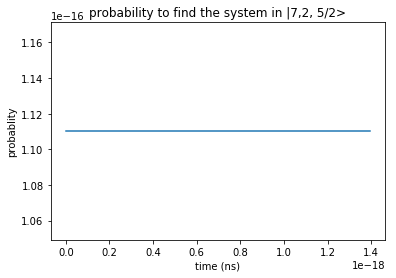

In [68]:
plt.title("probability to find the system in |7,2, 5/2>")
plt.xlabel("time (ns)")
plt.ylabel("probablity")
plt.plot(time,y)
plt.show()

I know my 9 is wrong i belive its a problem in the code since what I am doing is just chaging back to the |j,m> basis and ploting the norm of the term that corresponds to |7/2,5/2>. The problem is probably in the order that numpy gives me my eigen values.

Question 10 

In theroy the latter is better. Since we ignore higher order terms in U(t) making it non unitary forcing us to normalize, which only adds to the error of doing many repeated calculations. Even if we make dt really small we will just get more error due the rounding error or multiple calculations. So the second way is preferable if we ignore my mistakes. 